In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer= load_breast_cancer()
x_train, x_test, y_train, y_test= train_test_split(cancer.data, cancer.target,
                                                   stratify= cancer.target,
                                                   random_state= 0)

### 기본 Decision model

In [3]:
tree= DecisionTreeClassifier(random_state= 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
train_score= tree.score(x_train, y_train)
test_score= tree.score(x_test, y_test)

In [5]:
print('train: ', train_score) # 과대접학이 잘 되는 모델임을 증명
print('test: ', test_score)
print('train - test: ', abs(train_score - test_score))

train:  1.0
test:  0.9020979020979021
train - test:  0.09790209790209792


### 가지치기

In [6]:
tree= DecisionTreeClassifier(max_depth= 3, random_state= 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [7]:
train_score= tree.score(x_train, y_train)
test_score= tree.score(x_test, y_test)

In [8]:
print('train: ', train_score) 
print('test: ', test_score)
print('train - test: ', abs(train_score - test_score))

train:  0.9765258215962441
test:  0.916083916083916
train - test:  0.06044190551232809


### 시각화

In [9]:
# 

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

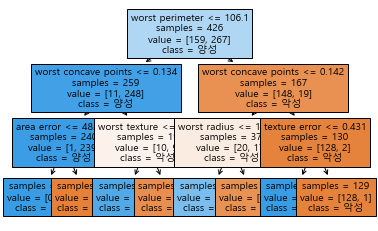

In [11]:
plot_tree(tree, class_names= ['악성', '양성'],
          feature_names= cancer.feature_names, impurity= False, filled= True, fontsize= 10)
plt.show()

### 특성 중요도
- 특성 중요도: 0~1사이의 값 중 / 0: 이 특성이 전혀 사용되지 않았다. 1: 정답 값이 완벽하게 예측 되었다.
- 특성 중요도의 전체 합= 1

In [12]:
print('특성 중요도: \n', tree.feature_importances_)

특성 중요도: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


(-1.0, 30.0)

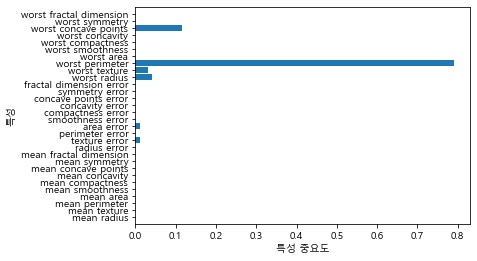

In [13]:
n_features= cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align= 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)

### Decision tree regressor

In [14]:
import os
import mglearn

In [15]:
ram_prices= pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

In [16]:
del ram_prices['Unnamed: 0']
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


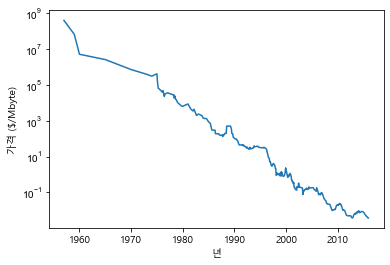

In [17]:
plt.yticks(fontname= 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [19]:
# 2000년 이전 데이터를 훈련 데이터로 그 이후는 테스트 데이터로 사용
data_train= ram_prices[ram_prices.date<2000]
data_test= ram_prices[ram_prices.date>=2000]

In [20]:
x_train= data_train.date.to_numpy()[:, np.newaxis]

In [21]:
y_train= np.log(data_train.price)

In [22]:
x_all= ram_prices.date.to_numpy()[:, np.newaxis]

In [23]:
tree= DecisionTreeRegressor().fit(x_train, y_train)
linear_reg= LinearRegression().fit(x_train, y_train)

In [24]:
pred_tree= tree.predict(x_all)
pred_lr= linear_reg.predict(x_all)

In [25]:
price_tree= np.exp(pred_tree)
price_lr= np.exp(pred_lr)

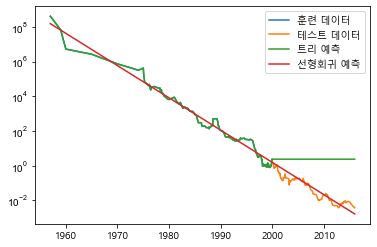

In [26]:
plt.yticks(fontname= 'Arial')
plt.semilogy(data_train.date, data_train.price, label= '훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label= '테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label= '트리 예측')
plt.semilogy(ram_prices.date, price_lr, label= '선형회귀 예측')
plt.legend()
plt.show()